# Lab : Image Classification using Convolutional Neural Networks

At the end of this laboratory, you would get familiarized with

*   Creating deep networks using Keras
*   Steps necessary in training a neural network
*   Prediction and performance analysis using neural networks

---

# **In case you use a colaboratory environment**
By default, Colab notebooks run on CPU.
You can switch your notebook to run with GPU.

In order to obtain access to the GPU, you need to choose the tab Runtime and then select “Change runtime type” as shown in the following figure:

![Changing runtime](https://miro.medium.com/max/747/1*euE7nGZ0uJQcgvkpgvkoQg.png)

When a pop-up window appears select GPU. Ensure “Hardware accelerator” is set to GPU.

# **Working with a new dataset: CIFAR-10**

The CIFAR-10 dataset consists of 60000 32x32 colour images in 10 classes, with 6000 images per class. There are 50000 training images and 10000 test images. More information about CIFAR-10 can be found [here](https://www.cs.toronto.edu/~kriz/cifar.html).

In Keras, the CIFAR-10 dataset is also preloaded in the form of four Numpy arrays. x_train and y_train contain the training set, while x_test and y_test contain the test data. The images are encoded as Numpy arrays and their corresponding labels ranging from 0 to 9.

Your task is to:

*   Visualize the images in CIFAR-10 dataset. Create a 10 x 10 plot showing 10 random samples from each class.
*   Convert the labels to one-hot encoded form.
*   Normalize the images.




In [1]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical

# Load CIFAR-10 dataset
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

170498071/170498071 [==============================] - 2s 0us/step


(50000, 32, 32, 3)
4
uint8
(10000, 32, 32, 3)


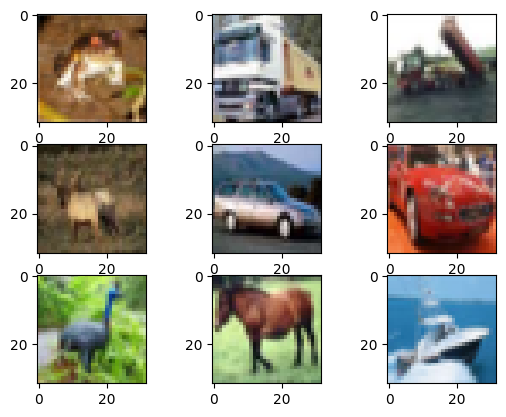

(50000, 10)
(10000, 10)
0.0 1.0
0.0 1.0


In [7]:
# Your code here :

(x_train, y_train), (x_test, y_test) = cifar10.load_data()

print(x_train.shape)
print(x_train.ndim)
print(x_train.dtype)
print(x_test.shape)

#ploting
import matplotlib.pyplot as plt
for i in range(9):
	plt.subplot(330 + 1 + i)
	plt.imshow(x_train[i], cmap=plt.get_cmap('gray'))
plt.show()

#one hot encoding
from tensorflow.keras.utils import to_categorical

y_train = to_categorical(y_train, num_classes=10)
y_test = to_categorical(y_test, num_classes=10)

print(y_train.shape)
print(y_test.shape)

# Normalize the images
x_train = x_train / 255.0
x_test = x_test / 255.0

print(x_train.min(), x_train.max())
print(x_test.min(), x_test.max())




## Define the following model (same as the one in tutorial)

For the convolutional front-end, start with a single convolutional layer with a small filter size (3,3) and a modest number of filters (32) followed by a max pooling layer.

Use the input as (32,32,3).

The filter maps can then be flattened to provide features to the classifier.

Use a dense layer with 100 units before the classification layer (which is also a dense layer with softmax activation).

In [8]:
from keras.backend import clear_session
clear_session()

In [9]:
# Your code here :
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', input_shape=(32, 32, 3)))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(100, activation='relu', kernel_initializer='he_uniform'))
model.add(Dense(10, activation='softmax'))


*   Compile the model using categorical_crossentropy loss, SGD optimizer and use 'accuracy' as the metric.
*   Use the above defined model to train CIFAR-10 and train the model for 50 epochs with a batch size of 512.

In [10]:
# Your code here :
model.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['accuracy'])

history = model.fit(x_train, y_train, batch_size=512, epochs=50, validation_split=0.1)

Epoch 1/50
88/88 [==============================] - 5s 47ms/step - loss: 2.1443 - accuracy: 0.2181 - val_loss: 2.0057 - val_accuracy: 0.2778
Epoch 2/50
88/88 [==============================] - 4s 44ms/step - loss: 1.9552 - accuracy: 0.3036 - val_loss: 1.9664 - val_accuracy: 0.2868
Epoch 3/50
88/88 [==============================] - 4s 44ms/step - loss: 1.8843 - accuracy: 0.3347 - val_loss: 1.8771 - val_accuracy: 0.3328
Epoch 4/50
88/88 [==============================] - 4s 43ms/step - loss: 1.8373 - accuracy: 0.3510 - val_loss: 1.8124 - val_accuracy: 0.3548
Epoch 5/50
88/88 [==============================] - 4s 44ms/step - loss: 1.7862 - accuracy: 0.3743 - val_loss: 1.7638 - val_accuracy: 0.3888
Epoch 6/50
88/88 [==============================] - 4s 44ms/step - loss: 1.7505 - accuracy: 0.3844 - val_loss: 1.8401 - val_accuracy: 0.3428
Epoch 7/50
88/88 [==============================] - 4s 44ms/step - loss: 1.7238 - accuracy: 0.3950 - val_loss: 1.7117 - val_accuracy: 0.3976
Epoch 8/50
88

*   Plot the cross entropy loss curve and the accuracy curve

[2.144348382949829, 1.9552359580993652, 1.8843069076538086, 1.8372522592544556, 1.7862358093261719, 1.7504887580871582, 1.7238153219223022, 1.6907960176467896, 1.6736363172531128, 1.639776587486267, 1.6225641965866089, 1.603819489479065, 1.5851683616638184, 1.562050700187683, 1.5480440855026245, 1.5315957069396973, 1.5071192979812622, 1.5008296966552734, 1.48586905002594, 1.4750131368637085, 1.4607446193695068, 1.4491339921951294, 1.440148949623108, 1.4279590845108032, 1.4176703691482544, 1.4054217338562012, 1.3999377489089966, 1.3849985599517822, 1.3825291395187378, 1.3654558658599854, 1.3546561002731323, 1.3590221405029297, 1.3407422304153442, 1.3369187116622925, 1.3275161981582642, 1.328180193901062, 1.316856026649475, 1.3071507215499878, 1.3006867170333862, 1.2885462045669556, 1.2858184576034546, 1.2785354852676392, 1.2784141302108765, 1.2638003826141357, 1.257907509803772, 1.2547606229782104, 1.2467236518859863, 1.2417893409729004, 1.2355486154556274, 1.2310545444488525]
[0.218088

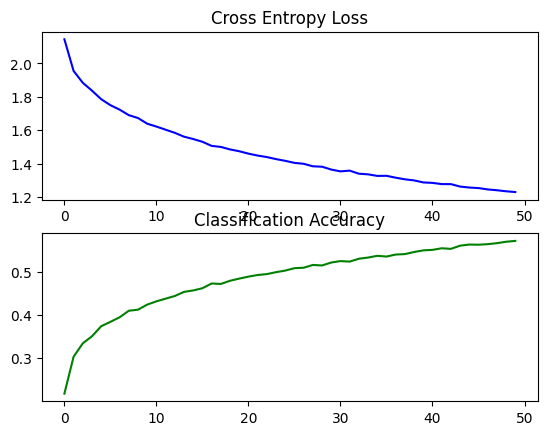

In [11]:
# Your code here :
print(history.history['loss']) # returns the loss value at the end of each epoch
print(history.history['accuracy']) # returns the accuracy at the end of each epoch

plt.subplot(211)
plt.title('Cross Entropy Loss')
plt.plot(history.history['loss'], color='blue', label='train')

plt.subplot(212)
plt.title('Classification Accuracy')
plt.plot(history.history['accuracy'], color='green', label='train')
plt.show()

## Defining Deeper Architectures: VGG Models

*   Define a deeper model architecture for CIFAR-10 dataset and train the new model for 50 epochs with a batch size of 512. We will use VGG model as the architecture.

Stack two convolutional layers with 32 filters, each of 3 x 3.

Use a max pooling layer and next flatten the output of the previous layer and add a dense layer with 128 units before the classification layer.

For all the layers, use ReLU activation function.

Use same padding for the layers to ensure that the height and width of each layer output matches the input


In [12]:
from keras.backend import clear_session
clear_session()

In [15]:
# Your code here :

model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(32, 32, 3)))
model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
model.add(Dense(10, activation='softmax'))

*   Compile the model using categorical_crossentropy loss, SGD optimizer and use 'accuracy' as the metric.
*   Use the above defined model to train CIFAR-10 and train the model for 50 epochs with a batch size of 512.

In [16]:
# Your code here :
model.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['accuracy'])

history = model.fit(x_train, y_train, batch_size=512, epochs=50, validation_split=0.1)

Epoch 1/50
88/88 [==============================] - 11s 119ms/step - loss: 2.1430 - accuracy: 0.2230 - val_loss: 2.0072 - val_accuracy: 0.2934
Epoch 2/50
88/88 [==============================] - 10s 115ms/step - loss: 1.9709 - accuracy: 0.3000 - val_loss: 1.9207 - val_accuracy: 0.3040
Epoch 3/50
88/88 [==============================] - 10s 117ms/step - loss: 1.8599 - accuracy: 0.3454 - val_loss: 1.8983 - val_accuracy: 0.3324
Epoch 4/50
88/88 [==============================] - 10s 117ms/step - loss: 1.7927 - accuracy: 0.3697 - val_loss: 1.7296 - val_accuracy: 0.3852
Epoch 5/50
88/88 [==============================] - 10s 118ms/step - loss: 1.7302 - accuracy: 0.3940 - val_loss: 1.7947 - val_accuracy: 0.3572
Epoch 6/50
88/88 [==============================] - 10s 116ms/step - loss: 1.6710 - accuracy: 0.4133 - val_loss: 1.6343 - val_accuracy: 0.4362
Epoch 7/50
88/88 [==============================] - 10s 115ms/step - loss: 1.6265 - accuracy: 0.4324 - val_loss: 1.6412 - val_accuracy: 0.4188

*   Compare the performance of both the models by plotting the loss and accuracy curves of both the training steps. Does the deeper model perform better? Comment on the observation.


[2.1430165767669678, 1.9709309339523315, 1.8598634004592896, 1.79274582862854, 1.7301990985870361, 1.6710423231124878, 1.6265451908111572, 1.5942540168762207, 1.5582059621810913, 1.5193800926208496, 1.4940876960754395, 1.463467001914978, 1.43610417842865, 1.4191720485687256, 1.4010815620422363, 1.3717341423034668, 1.361209750175476, 1.3365302085876465, 1.3192542791366577, 1.3028448820114136, 1.2829325199127197, 1.269100308418274, 1.2495365142822266, 1.2400447130203247, 1.2119125127792358, 1.203887701034546, 1.190796136856079, 1.1703349351882935, 1.157689094543457, 1.1489858627319336, 1.1324431896209717, 1.1252092123031616, 1.110562801361084, 1.0949199199676514, 1.0823893547058105, 1.0678929090499878, 1.060787320137024, 1.0491883754730225, 1.0349245071411133, 1.0303643941879272, 1.013598084449768, 1.0147358179092407, 0.9937210083007812, 0.9889714121818542, 0.9852139949798584, 0.9728590250015259, 0.9596928954124451, 0.9577611088752747, 0.9496733546257019, 0.9329556226730347]
[0.223044440

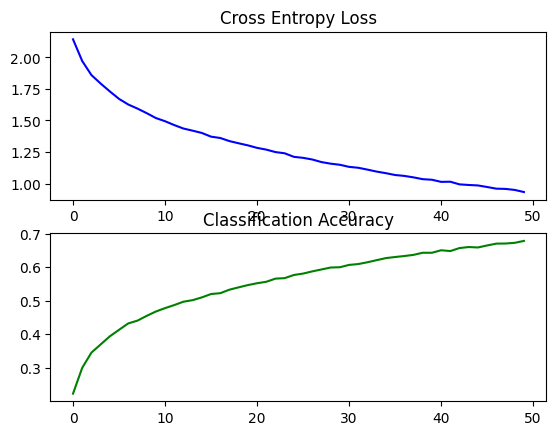

In [17]:
# Your code here :

# Your code here :
print(history.history['loss']) # returns the loss value at the end of each epoch
print(history.history['accuracy']) # returns the accuracy at the end of each epoch

plt.subplot(211)
plt.title('Cross Entropy Loss')
plt.plot(history.history['loss'], color='blue', label='train')

plt.subplot(212)
plt.title('Classification Accuracy')
plt.plot(history.history['accuracy'], color='green', label='train')
plt.show()

#models have the same variable name, will not repeat that mistake but to save time i will watch the plots from an earlier cell to compare



**Comment on the observation**

*(Double-click or enter to edit)*

...

*   Use predict function to predict the output for the test split
*   Plot the confusion matrix for the new model and comment on the class confusions.


In [19]:
# Your code here :
preds = model.predict(x_test)

import numpy as np
preds = np.argmax(preds, axis=1)

from sklearn.metrics import confusion_matrix
gt = np.argmax(y_test, axis=1)

confusion_matrix(gt, preds)

313/313 [==============================] - 1s 4ms/step


array([[746,  20,  65,  18,   7,  12,   8,  14,  67,  43],
       [ 40, 716,  21,  14,   0,   6,   7,   7,  45, 144],
       [ 86,   9, 537,  50,  69, 107,  47,  68,  11,  16],
       [ 29,  11,  94, 383,  49, 279,  57,  53,  15,  30],
       [ 45,   5, 163,  60, 484,  69,  46, 106,  12,  10],
       [ 19,   3,  75, 123,  40, 626,  25,  71,   7,  11],
       [ 13,  14,  85,  72,  71,  53, 641,  26,  10,  15],
       [ 17,   3,  50,  36,  42, 102,   7, 712,   4,  27],
       [105,  66,  24,  19,   9,  17,   5,   5, 698,  52],
       [ 57, 110,  19,  18,   2,  15,  11,  35,  31, 702]])

**Comment here :**

*(Double-click or enter to edit)*
there is a lot of confusion in every class. perhaps adding more layers and/or changing parameters
...

*    Print the test accuracy for the trained model.

In [20]:
# Your code here :

test_loss, test_acc = model.evaluate(x_test, y_test)
print('Test loss:', test_loss)
print('Test accuracy:', test_acc)

313/313 [==============================] - 1s 4ms/step - loss: 1.0804 - accuracy: 0.6245
Test loss: 1.0804301500320435
Test accuracy: 0.6244999766349792


## Define the complete VGG architecture.

Stack two convolutional layers with 64 filters, each of 3 x 3 followed by max pooling layer.

Stack two more convolutional layers with 128 filters, each of 3 x 3, followed by max pooling, followed by two more convolutional layers with 256 filters, each of 3 x 3, followed by max pooling.

Flatten the output of the previous layer and add a dense layer with 128 units before the classification layer.

For all the layers, use ReLU activation function.

Use same padding for the layers to ensure that the height and width of each layer output matches the input

*   Change the size of input to 64 x 64.

In [21]:
from keras.backend import clear_session
clear_session()

In [24]:
import tensorflow as tf

x_train_resized = tf.image.resize(x_train, [64, 64])
x_test_resized = tf.image.resize(x_test, [64, 64])

In [25]:
# Your code here :



model = Sequential()
model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(64, 64, 3)))
model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(256, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(Conv2D(256, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
model.add(Dense(10, activation='softmax'))

*   Compile the model using categorical_crossentropy loss, SGD optimizer and use 'accuracy' as the metric.
*   Use the above defined model to train CIFAR-10 and train the model for 10 epochs with a batch size of 512.
*   Predict the output for the test split and plot the confusion matrix for the new model and comment on the class confusions.

In [26]:
# Your code here :
model.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['accuracy'])

history = model.fit(x_train_resized, y_train, batch_size=512, epochs=10, validation_split=0.1)

prediction = model.predict(x_test_resized)

prediction = np.argmax(prediction, axis=1)

gt = np.argmax(y_test, axis=1)

print(confusion_matrix(gt, prediction))

test_loss, test_acc = model.evaluate(x_test, y_test)
print('Test loss:', test_loss)
print('Test accuracy:', test_acc)




Epoch 1/10
88/88 [==============================] - 266s 3s/step - loss: 2.1935 - accuracy: 0.2102 - val_loss: 2.1862 - val_accuracy: 0.2166
Epoch 2/10
88/88 [==============================] - 262s 3s/step - loss: 2.0071 - accuracy: 0.2946 - val_loss: 1.8575 - val_accuracy: 0.3530
Epoch 3/10
88/88 [==============================] - 262s 3s/step - loss: 1.8497 - accuracy: 0.3508 - val_loss: 1.6743 - val_accuracy: 0.4180
Epoch 4/10
88/88 [==============================] - 262s 3s/step - loss: 1.6984 - accuracy: 0.4013 - val_loss: 1.6748 - val_accuracy: 0.4124
Epoch 5/10
88/88 [==============================] - 263s 3s/step - loss: 1.5812 - accuracy: 0.4410 - val_loss: 1.4800 - val_accuracy: 0.4754
Epoch 6/10
88/88 [==============================] - 262s 3s/step - loss: 1.4959 - accuracy: 0.4694 - val_loss: 1.4505 - val_accuracy: 0.4970
Epoch 7/10
88/88 [==============================] - 263s 3s/step - loss: 1.4236 - accuracy: 0.4967 - val_loss: 1.3738 - val_accuracy: 0.5194
Epoch 8/10
88

InvalidArgumentError: Graph execution error:

Detected at node sequential_1/dense_2/Relu defined at (most recent call last):
  File "/usr/lib/python3.10/runpy.py", line 196, in _run_module_as_main

  File "/usr/lib/python3.10/runpy.py", line 86, in _run_code

  File "/usr/local/lib/python3.10/dist-packages/colab_kernel_launcher.py", line 37, in <module>

  File "/usr/local/lib/python3.10/dist-packages/traitlets/config/application.py", line 992, in launch_instance

  File "/usr/local/lib/python3.10/dist-packages/ipykernel/kernelapp.py", line 619, in start

  File "/usr/local/lib/python3.10/dist-packages/tornado/platform/asyncio.py", line 195, in start

  File "/usr/lib/python3.10/asyncio/base_events.py", line 603, in run_forever

  File "/usr/lib/python3.10/asyncio/base_events.py", line 1909, in _run_once

  File "/usr/lib/python3.10/asyncio/events.py", line 80, in _run

  File "/usr/local/lib/python3.10/dist-packages/tornado/ioloop.py", line 685, in <lambda>

  File "/usr/local/lib/python3.10/dist-packages/tornado/ioloop.py", line 738, in _run_callback

  File "/usr/local/lib/python3.10/dist-packages/tornado/gen.py", line 825, in inner

  File "/usr/local/lib/python3.10/dist-packages/tornado/gen.py", line 786, in run

  File "/usr/local/lib/python3.10/dist-packages/ipykernel/kernelbase.py", line 361, in process_one

  File "/usr/local/lib/python3.10/dist-packages/tornado/gen.py", line 234, in wrapper

  File "/usr/local/lib/python3.10/dist-packages/ipykernel/kernelbase.py", line 261, in dispatch_shell

  File "/usr/local/lib/python3.10/dist-packages/tornado/gen.py", line 234, in wrapper

  File "/usr/local/lib/python3.10/dist-packages/ipykernel/kernelbase.py", line 539, in execute_request

  File "/usr/local/lib/python3.10/dist-packages/tornado/gen.py", line 234, in wrapper

  File "/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py", line 302, in do_execute

  File "/usr/local/lib/python3.10/dist-packages/ipykernel/zmqshell.py", line 539, in run_cell

  File "/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py", line 2975, in run_cell

  File "/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py", line 3030, in _run_cell

  File "/usr/local/lib/python3.10/dist-packages/IPython/core/async_helpers.py", line 78, in _pseudo_sync_runner

  File "/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py", line 3257, in run_cell_async

  File "/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py", line 3473, in run_ast_nodes

  File "/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py", line 3553, in run_code

  File "<ipython-input-26-0f863101c166>", line 14, in <cell line: 14>

  File "/usr/local/lib/python3.10/dist-packages/keras/src/utils/traceback_utils.py", line 65, in error_handler

  File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 2296, in evaluate

  File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 4108, in run_step

  File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 2066, in test_function

  File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 2049, in step_function

  File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 2037, in run_step

  File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 1917, in test_step

  File "/usr/local/lib/python3.10/dist-packages/keras/src/utils/traceback_utils.py", line 65, in error_handler

  File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 590, in __call__

  File "/usr/local/lib/python3.10/dist-packages/keras/src/utils/traceback_utils.py", line 65, in error_handler

  File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/base_layer.py", line 1149, in __call__

  File "/usr/local/lib/python3.10/dist-packages/keras/src/utils/traceback_utils.py", line 96, in error_handler

  File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/sequential.py", line 398, in call

  File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/functional.py", line 515, in call

  File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/functional.py", line 672, in _run_internal_graph

  File "/usr/local/lib/python3.10/dist-packages/keras/src/utils/traceback_utils.py", line 65, in error_handler

  File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/base_layer.py", line 1149, in __call__

  File "/usr/local/lib/python3.10/dist-packages/keras/src/utils/traceback_utils.py", line 96, in error_handler

  File "/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py", line 255, in call

  File "/usr/local/lib/python3.10/dist-packages/keras/src/activations.py", line 306, in relu

  File "/usr/local/lib/python3.10/dist-packages/keras/src/backend.py", line 5395, in relu

Matrix size-incompatible: In[0]: [32,4096], In[1]: [16384,128]
	 [[{{node sequential_1/dense_2/Relu}}]] [Op:__inference_test_function_59545]

# Understanding deep networks

*   What is the use of activation functions in network? Why is it needed?
*   We have used softmax activation function in the exercise. There are other activation functions available too. What is the difference between sigmoid activation and softmax activation?
*   What is the difference between categorical crossentropy and binary crossentropy loss?

**Write the answers below :**

1 - Use of activation functions:



_

2 - Key Differences between sigmoid and softmax:



_

3 - Key Differences between categorical crossentropy and binary crossentropy loss:


_
